In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
import matplotlib.patheffects as path_effects



In [2]:
df = pd.read_csv('Speed_Camera_Violations.csv')

In [3]:
df = df.sort_values(by = 'VIOLATION DATE')

In [4]:
df.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

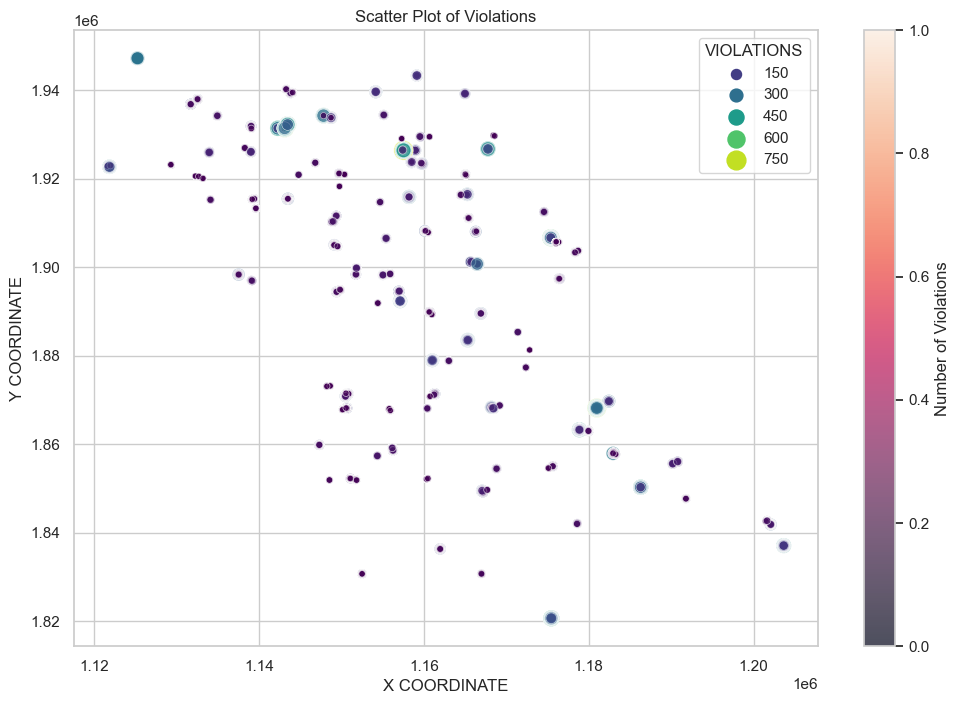

In [5]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='X COORDINATE', y='Y COORDINATE', hue='VIOLATIONS', size='VIOLATIONS', sizes=(20, 200),
                               data=df, palette='viridis', edgecolor='w', linewidth=0.5, alpha=0.7)

# Set labels and title
plt.xlabel('X COORDINATE')
plt.ylabel('Y COORDINATE')
plt.title('Scatter Plot of Violations')

# Add colorbar directly from the scatter plot
cbar = scatter_plot.figure.colorbar(scatter_plot.collections[0])
cbar.set_label('Number of Violations')

# Show the plot
plt.show()


Text(0, 0.5, 'Number of Violations')

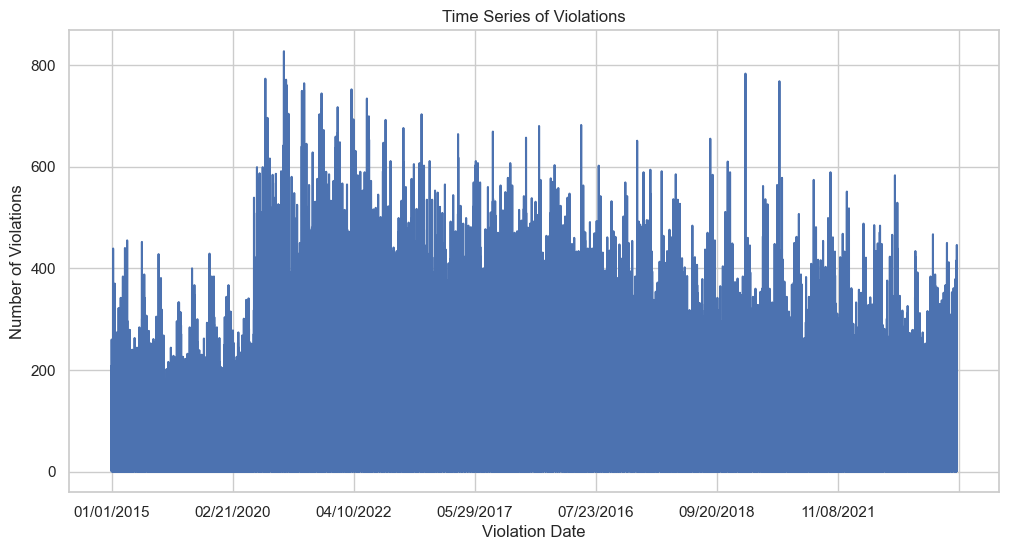

In [6]:
time_series_plot = df.set_index('VIOLATION DATE')['VIOLATIONS'].plot(figsize=(12, 6))
plt.title('Time Series of Violations')
plt.xlabel('Violation Date')
plt.ylabel('Number of Violations')

In [7]:
df.columns

Index(['ADDRESS', 'CAMERA ID', 'VIOLATION DATE', 'VIOLATIONS', 'X COORDINATE',
       'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                      ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  \
303097        3542 E 95TH ST    CHI141     01/01/2015          13   
229682           3450 W 71ST    CHI015     01/01/2015          22   
137774  10318 S INDIANAPOLIS    CHI120     01/01/2015         143   
198664    5454 W IRVING PARK    CHI050     01/01/2015          58   
261746          2900 W OGDEN    CHI021     01/01/2015         114   
...                      ...       ...            ...         ...   
340733         6909 S KEDZIE    CHI014     12/31/2022          35   
340732        1507 W 83rd ST    CHI170     12/31/2022          22   
340731        6523 N WESTERN    CHI051     12/31/2022         120   
340754         6818 S KEDZIE    CHI018     12/31/2022          41   
340706       5432 W LAWRENCE    CHI103     12/31/2022           9   

        X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE  \
303097  1.201629e+06  1.842674e+06  41.723045 -87.537041   
229682  1.154378e+06 

In [9]:
df.head(3)

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
303097,3542 E 95TH ST,CHI141,01/01/2015,13,1.201629e+06,1.842674e+06,41.723045,-87.537041,"(41.72304461975978, -87.5370407583455)"
229682,3450 W 71ST,CHI015,01/01/2015,22,1.154378e+06,1.857352e+06,41.764391,-87.709728,"(41.76439095689881, -87.70972841983624)"
137774,10318 S INDIANAPOLIS,CHI120,01/01/2015,143,1.203645e+06,1.837056e+06,41.707577,-87.529848,"(41.70757690291348, -87.52984826112849)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349364 entries, 303097 to 340706
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ADDRESS         349364 non-null  object 
 1   CAMERA ID       349361 non-null  object 
 2   VIOLATION DATE  349364 non-null  object 
 3   VIOLATIONS      349364 non-null  int64  
 4   X COORDINATE    336210 non-null  float64
 5   Y COORDINATE    336210 non-null  float64
 6   LATITUDE        336210 non-null  float64
 7   LONGITUDE       336210 non-null  float64
 8   LOCATION        336210 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 26.7+ MB


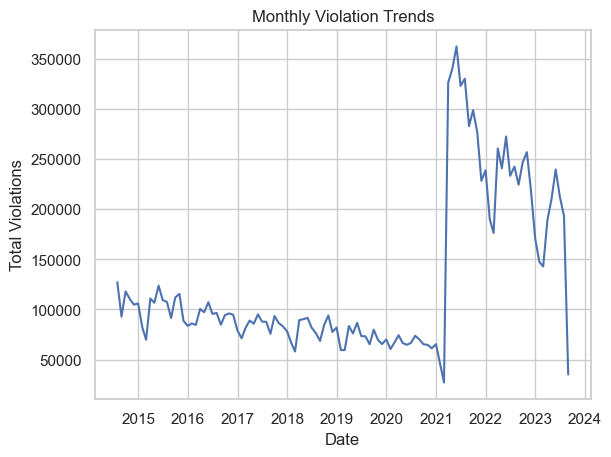

In [11]:
df['VIOLATION DATE'] = pd.to_datetime(df['VIOLATION DATE'])
df.set_index('VIOLATION DATE', inplace=True)

plt.plot(df.resample('M').sum()['VIOLATIONS'])
plt.title('Monthly Violation Trends')
plt.xlabel('Date')
plt.ylabel('Total Violations')
plt.show()